In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Harish@2006",
    database="demo",
    auth_plugin="mysql_native_password",
    use_pure=True
)

In [6]:
query = "SELECT * FROM ml"
df = pd.read_sql(query, conn)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13684\1719241753.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [7]:
df.head()

,SNO,Name,age,height,weight,marks
0,1,Student1,18,160.0,55.0,72.0
1,2,Student2,19,162.0,56.0,74.0
2,3,Student3,20,164.0,57.0,76.0
3,4,Student4,18,165.0,58.0,78.0
4,5,Student5,19,166.0,59.0,80.0


In [8]:
df=df.drop(['SNO','marks','Name'],axis=1)

In [10]:
df.columns

Index(['age', 'height', 'weight'], dtype='object')

In [11]:
X=df.drop(['age'],axis=1)
Y=df['age']

In [12]:
X

,height,weight
0,160.0,55.0
1,162.0,56.0
2,164.0,57.0
3,165.0,58.0
4,166.0,59.0
...,...,...
95,171.0,65.0
96,173.0,67.0
97,175.0,69.0
98,177.0,71.0


In [13]:
Y

0     18
1     19
2     20
3     18
4     19
      ..
95    20
96    18
97    19
98    20
99    18
Name: age, Length: 100, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [25]:
X_train

,height,weight
15,178.0,70.0
40,180.0,70.0
96,173.0,67.0
9,172.0,64.0
72,173.0,63.0
...,...,...
60,172.0,64.0
71,171.0,61.0
14,177.0,69.0
92,165.0,59.0


In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [48]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((75, 2), (25, 2), (75,), (25,))

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
reg=LinearRegression(n_jobs=-1)

In [39]:
reg.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [40]:
reg.intercept_

np.float64(19.04)

In [41]:
reg.coef_

array([ 0.14397522, -0.05765608])

In [42]:
y_pred=reg.predict(X_test)

In [43]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mae=mean_squared_error(Y_test,y_pred)
mse=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("mae: ",mae)
print("mse: ",mse)
print("score: ",score)

mae:  0.5812462991770839
mse:  0.6335530693015023
score:  0.0539611015997985


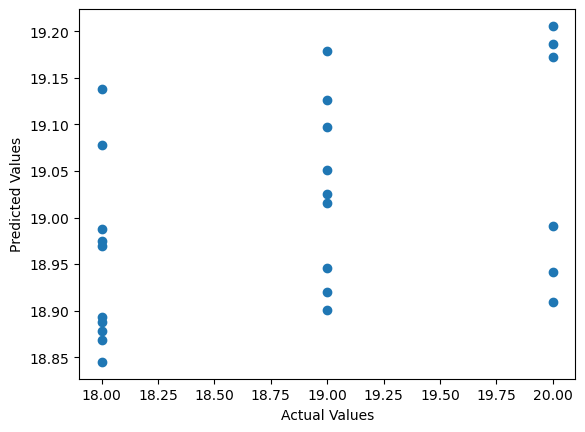

In [50]:
y_pred = reg.predict(X_test)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


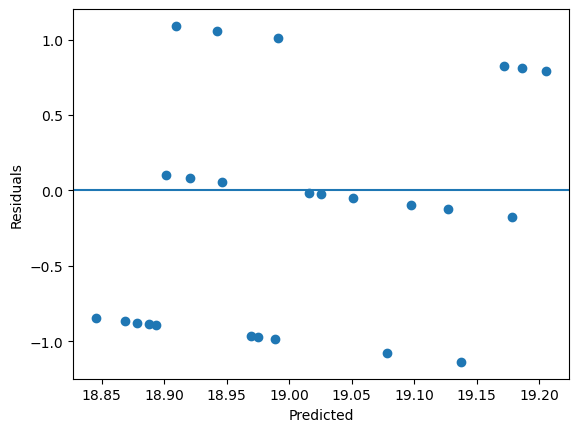

In [51]:
residuals = Y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


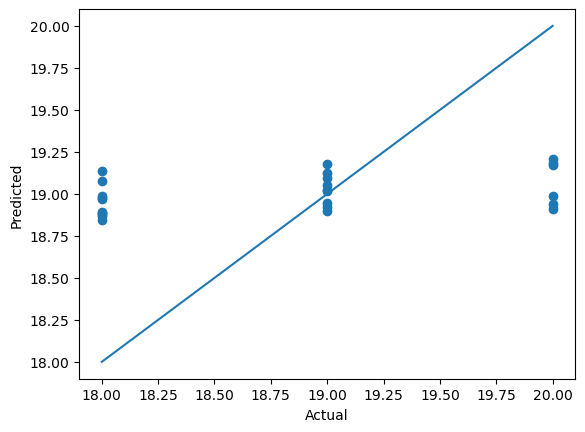

In [52]:
plt.scatter(Y_test, y_pred)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
